<a href="https://colab.research.google.com/github/chayanit2022/BADS7105-CRM-Analytics/blob/main/Product_Recoommendation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install mlxtend

In [ ]:
from google.colab import  drive
drive.mount('/drive')

Drive already mounted at /drive; to attempt to forcibly remount, call drive.mount("/drive", force_remount=True).


In [ ]:
import pandas as pd

df = pd.read_csv('Customer Preference Survey.csv')

In [ ]:
df.head(5)

,Timestamp,โปรแกรมแท้,เครื่องซักผ้า,NONE,รองเท้าวิ่ง,ผักกรอบ,คอร์สเรียนเสริม,nintendo switch,BTC (Bitcoin),mechanical keyboard,เครื่องดูดฝุ่น Dyson,เคส ipad,คุณเคยซื้อโต๊ะปรับระดับหรือไม่,สินค้าจากพิมรี่พาย,I PHONE 13,"หูฟัง bluetooth (airpods,truewireless)",แก้วน้ำ Starbucks,เบาะรองนั่ง,เครื่องชงกาแฟแคปซูล,ตั๋วเครื่องบินไปญี่ปุ่น,Ebook,ตู้เย็น,กล้องฟิล์ม,เครื่องดนตรี,whey protein,วัตถุมงคล,กระบองเพชรพูดได้,ROV Skin
0,10/28/2021 14:05:59,NaN,NaN,NaN,เคยซื้อ,เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,ไม่เคย,ไม่เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ
1,10/28/2021 14:06:18,NaN,NaN,NaN,เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,เคยซื้อ,เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,ไม่เคย,เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ
2,10/28/2021 14:06:20,NaN,NaN,NaN,เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,ไม่เคย,ไม่เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ
3,10/28/2021 14:06:21,NaN,NaN,NaN,เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,เคยซื้อ,เคย,ไม่เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ
4,10/28/2021 14:06:23,NaN,NaN,NaN,เคยซื้อ,เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,ไม่เคย,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ


In [ ]:
#applymap =  apply all cells
def encode_units(x):
    if x == "ไม่เคยซื้อ":
        return 0
    if x == "เคยซื้อ":
        return 1
hot_encoded_df = df.applymap(encode_units).fillna(0)
hot_encoded_df = hot_encoded_df.drop(["Timestamp","NONE"], axis=1)
hot_encoded_df = hot_encoded_df.astype('int64')

In [ ]:
hot_encoded_df.head(5)

,โปรแกรมแท้,เครื่องซักผ้า,รองเท้าวิ่ง,ผักกรอบ,คอร์สเรียนเสริม,nintendo switch,BTC (Bitcoin),mechanical keyboard,เครื่องดูดฝุ่น Dyson,เคส ipad,คุณเคยซื้อโต๊ะปรับระดับหรือไม่,สินค้าจากพิมรี่พาย,I PHONE 13,"หูฟัง bluetooth (airpods,truewireless)",แก้วน้ำ Starbucks,เบาะรองนั่ง,เครื่องชงกาแฟแคปซูล,ตั๋วเครื่องบินไปญี่ปุ่น,Ebook,ตู้เย็น,กล้องฟิล์ม,เครื่องดนตรี,whey protein,วัตถุมงคล,กระบองเพชรพูดได้,ROV Skin
0,0,0,1,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0
1,0,0,1,0,1,1,1,1,0,1,0,0,0,1,0,1,0,0,1,0,1,0,1,0,0,1
2,0,0,1,0,1,0,1,0,0,1,0,0,0,1,1,1,0,1,0,0,0,1,0,0,0,0
3,0,0,1,0,1,0,1,0,1,1,0,1,0,1,0,1,0,1,1,0,0,1,0,0,0,0
4,0,0,1,1,1,0,0,0,0,1,0,1,0,1,0,1,0,1,0,0,0,0,0,0,0,0


In [ ]:
#Check missing, count missing
missing = hot_encoded_df.isnull().sum()
print(missing)

โปรแกรมแท้                                0
เครื่องซักผ้า                             0
รองเท้าวิ่ง                               0
ผักกรอบ                                   0
คอร์สเรียนเสริม                           0
nintendo switch                           0
BTC (Bitcoin)                             0
mechanical keyboard                       0
เครื่องดูดฝุ่น Dyson                      0
เคส ipad                                  0
คุณเคยซื้อโต๊ะปรับระดับหรือไม่            0
สินค้าจากพิมรี่พาย                        0
I PHONE 13                                0
หูฟัง bluetooth (airpods,truewireless)    0
แก้วน้ำ Starbucks                         0
เบาะรองนั่ง                               0
เครื่องชงกาแฟแคปซูล                       0
ตั๋วเครื่องบินไปญี่ปุ่น                   0
Ebook                                     0
ตู้เย็น                                   0
กล้องฟิล์ม                                0
เครื่องดนตรี                              0
whey protein                    

In [ ]:
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
frequent_itemsets = apriori(hot_encoded_df, min_support=0.05, use_colnames=True)   #min_support = สินค้าที่มี prob ต่ำหว่า 0.01 ไม่แสดง, probต่ำ คือ คนไม่ค่อยซื้อ

In [ ]:
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
rules.head(10)
#cofidence = โอกาสที่จะซื้อพร้อมกัน =ซื้อด้วยกันปกติ =  ธรรมดา
#Lift = ความ surpise ที่่จะซื้อพร้อมกัน
#่ที่ควรทำคือ confidence สูง และ Lift สูง

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(โปรแกรมแท้),(ผักกรอบ),0.379310,0.344828,0.137931,0.363636,1.054545,0.007134,1.029557
1,(ผักกรอบ),(โปรแกรมแท้),0.344828,0.379310,0.137931,0.400000,1.054545,0.007134,1.034483
2,(คอร์สเรียนเสริม),(โปรแกรมแท้),0.931034,0.379310,0.379310,0.407407,1.074074,0.026159,1.047414
3,(โปรแกรมแท้),(คอร์สเรียนเสริม),0.379310,0.931034,0.379310,1.000000,1.074074,0.026159,inf
4,(nintendo switch),(โปรแกรมแท้),0.241379,0.379310,0.103448,0.428571,1.129870,0.011891,1.086207
5,(โปรแกรมแท้),(nintendo switch),0.379310,0.241379,0.103448,0.272727,1.129870,0.011891,1.043103
6,(mechanical keyboard),(โปรแกรมแท้),0.172414,0.379310,0.103448,0.600000,1.581818,0.038050,1.551724
7,(โปรแกรมแท้),(mechanical keyboard),0.379310,0.172414,0.103448,0.272727,1.581818,0.038050,1.137931
8,(เคส ipad),(โปรแกรมแท้),0.896552,0.379310,0.344828,0.384615,1.013986,0.004756,1.008621
9,(โปรแกรมแท้),(เคส ipad),0.379310,0.896552,0.344828,0.909091,1.013986,0.004756,1.137931


In [ ]:
rules[ (rules['lift'] >= 1.2) &
       (rules['confidence'] >= 0.5) ]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
6,(mechanical keyboard),(โปรแกรมแท้),0.172414,0.379310,0.103448,0.600000,1.581818,0.038050,1.551724
10,(เครื่องชงกาแฟแคปซูล),(โปรแกรมแท้),0.103448,0.379310,0.068966,0.666667,1.757576,0.029727,1.862069
15,(whey protein),(โปรแกรมแท้),0.206897,0.379310,0.103448,0.500000,1.318182,0.024970,1.241379
48,(nintendo switch),(ผักกรอบ),0.241379,0.344828,0.137931,0.571429,1.657143,0.054697,1.528736
60,(whey protein),(ผักกรอบ),0.206897,0.344828,0.137931,0.666667,1.933333,0.066587,1.965517
...,...,...,...,...,...,...,...,...,...
331513,"(whey protein, ตั๋วเครื่องบินไปญี่ปุ่น)","(Ebook, คอร์สเรียนเสริม, โปรแกรมแท้, ผักกรอบ, ...",0.103448,0.068966,0.068966,0.666667,9.666667,0.061831,2.793103
331515,"(mechanical keyboard, ตั๋วเครื่องบินไปญี่ปุ่น)","(Ebook, คอร์สเรียนเสริม, โปรแกรมแท้, ผักกรอบ, ...",0.103448,0.068966,0.068966,0.666667,9.666667,0.061831,2.793103
331522,"(mechanical keyboard, whey protein)","(Ebook, คอร์สเรียนเสริม, โปรแกรมแท้, เบาะรองนั...",0.103448,0.068966,0.068966,0.666667,9.666667,0.061831,2.793103
331523,"(whey protein, เบาะรองนั่ง)","(Ebook, คอร์สเรียนเสริม, โปรแกรมแท้, ผักกรอบ, ...",0.137931,0.068966,0.068966,0.500000,7.250000,0.059453,1.862069


In [ ]:
#hot_encoded_df.columns = items name
item_item_matrix = pd.DataFrame(index=hot_encoded_df.columns,columns=hot_encoded_df.columns)

In [ ]:
from scipy.spatial.distance import cosine

for i in range(0,len(item_item_matrix.columns)) :
    # Loop through the columns for each column
    for j in range(0,len(item_item_matrix.columns)) :
      # Fill in placeholder with cosine similarities
      item_item_matrix.iloc[i,j] = 1 -cosine(hot_encoded_df.iloc[:,i],hot_encoded_df.iloc[:,j])

/usr/local/lib/python3.7/dist-packages/scipy/spatial/distance.py:720: RuntimeWarning: invalid value encountered in double_scalars
  dist = 1.0 - uv / np.sqrt(uu * vv)


In [ ]:
 item_item_matrix

,โปรแกรมแท้,เครื่องซักผ้า,รองเท้าวิ่ง,ผักกรอบ,คอร์สเรียนเสริม,nintendo switch,BTC (Bitcoin),mechanical keyboard,เครื่องดูดฝุ่น Dyson,เคส ipad,คุณเคยซื้อโต๊ะปรับระดับหรือไม่,สินค้าจากพิมรี่พาย,I PHONE 13,"หูฟัง bluetooth (airpods,truewireless)",แก้วน้ำ Starbucks,เบาะรองนั่ง,เครื่องชงกาแฟแคปซูล,ตั๋วเครื่องบินไปญี่ปุ่น,Ebook,ตู้เย็น,กล้องฟิล์ม,เครื่องดนตรี,whey protein,วัตถุมงคล,กระบองเพชรพูดได้,ROV Skin
โปรแกรมแท้,1,NaN,0.569803,0.381385,0.638285,0.341882,0.334497,0.40452,0.213201,0.591312,0.301511,0,NaN,0.514259,0.227921,0.452267,0.348155,0.402015,0.4842,NaN,0.13484,0.376889,0.369274,0.113961,0.301511,0.341882
เครื่องซักผ้า,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
รองเท้าวิ่ง,0.569803,NaN,1,0.597614,0.945611,0.5,0.681385,0.422577,0.267261,0.926562,0.188982,0.327327,NaN,0.886405,0.5,0.708683,0.327327,0.503953,0.823754,NaN,0.422577,0.708683,0.46291,0.5,0.188982,0.5
ผักกรอบ,0.381385,NaN,0.597614,1,0.608581,0.478091,0.0877058,0.282843,0.223607,0.496139,0.316228,0.182574,NaN,0.53936,0,0.474342,0.182574,0.316228,0.435286,NaN,0.282843,0.474342,0.516398,0.478091,0,0.119523
คอร์สเรียนเสริม,0.638285,NaN,0.945611,0.608581,1,0.509175,0.587137,0.430331,0.272166,0.905822,0.19245,0.333333,NaN,0.82061,0.509175,0.7698,0.222222,0.57735,0.794719,NaN,0.430331,0.721688,0.471405,0.436436,0.19245,0.436436
nintendo switch,0.341882,NaN,0.5,0.478091,0.509175,1,0.314485,0.507093,0.267261,0.518875,0.377964,0,NaN,0.564076,0.285714,0.377964,0,0.377964,0.520266,NaN,0.507093,0.283473,0.617213,0.142857,0,0.428571
BTC (Bitcoin),0.334497,NaN,0.681385,0.0877058,0.587137,0.314485,1,0.372104,0.196116,0.652714,0,0.320256,NaN,0.709575,0.419314,0.485363,0.320256,0.27735,0.636285,NaN,0.248069,0.346688,0.113228,0.209657,0.27735,0.419314
mechanical keyboard,0.40452,NaN,0.422577,0.282843,0.430331,0.507093,0.372104,1,0.316228,0.438529,0.447214,0,NaN,0.381385,0.169031,0.33541,0.516398,0.447214,0.512989,NaN,0.2,0.223607,0.547723,0,0.447214,0.338062
เครื่องดูดฝุ่น Dyson,0.213201,NaN,0.267261,0.223607,0.272166,0.267261,0.196116,0.316228,1,0.27735,0.707107,0.408248,NaN,0.301511,0,0.353553,0,0.471405,0.324443,NaN,0,0.353553,0.288675,0,0,0
เคส ipad,0.591312,NaN,0.926562,0.496139,0.905822,0.518875,0.652714,0.438529,0.27735,1,0.196116,0.339683,NaN,0.836242,0.518875,0.784465,0.339683,0.588348,0.809858,NaN,0.438529,0.784465,0.480384,0.370625,0.196116,0.518875


In [ ]:
# .stack = convert format from horizal to vertical
links = item_item_matrix.rename_axis('related item', 
                                     axis='columns').stack().reset_index()
links.columns = ['item', 'related item','value']

In [ ]:
links_filtered=links.loc[ (links['value'] > 0.1) & 
                         (links['item'] != links['related item']) ]

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 3650 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 3611 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 3619 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 3649 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 3585 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 3617 missing from current font.
  font.set_text(s

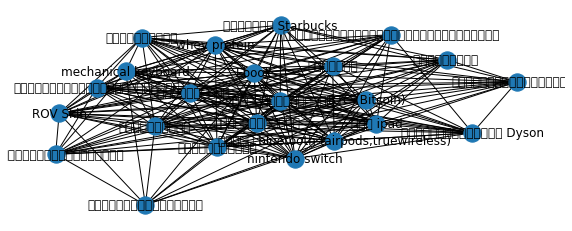

In [ ]:
import matplotlib.pyplot as plt
import networkx as nx

fig, ax=plt.subplots(figsize=(10,4))
GA=nx.from_pandas_edgelist(links_filtered,source='item',target='related item')
nx.draw(GA,with_labels=True)
plt.show()

ซื้อโปรแกรมแท้ แนะนำ ให้ซื้อ คอร์สเรียนเสริม